## Algorithm Complexity and Timing Code

In [106]:
## see Advanced R 17.3 by Wickham for more on the microbenchmark package
library(microbenchmark)

In [110]:
## create data sets in sizes of power of 10
ns <- 2^(11:15)
x <- vector("list",length(ns))
for(ii in 1:length(x)){
    x[[ii]] <- rnorm(ns[ii])
    
}

In [111]:
## computes mean for data set x[[ii]]
MeanTest <- function(ii){
    mean(x[[ii]])
}

In [112]:
out <- microbenchmark(MeanTest(1),MeanTest(2),MeanTest(3),MeanTest(4),MeanTest(5))
summary(out)

expr,min,lq,mean,median,uq,max,neval
MeanTest(1),6.271,6.5835,7.25372,6.7595,7.1450,26.607,100
MeanTest(2),10.088,10.3750,23.00160,10.5430,11.1075,1226.997,100
MeanTest(3),17.502,17.8635,18.80494,18.0540,18.6260,40.192,100
MeanTest(4),32.553,32.8020,33.61754,33.1550,33.6885,49.059,100
MeanTest(5),62.430,62.6625,63.52011,62.8000,63.1155,90.105,100


In [113]:
summary(out)$median

[1]  6.7595 10.5430 18.0540 33.1550 62.8000

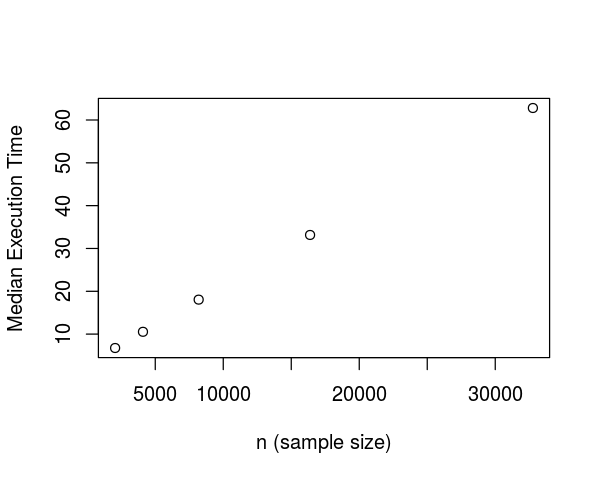

In [114]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,summary(out)$median,xlab="n (sample size)",ylab="Median Execution Time")

## Advice for Speed Tests

* Run functions several times and use median time
* For estimating algorithm order (O(n), O(nlogn) O(n^2) etc., use powers of 2 or 10

In [117]:
x <- rnorm(1e6)
y <- rnorm(1e7)
out <- microbenchmark(mean(x),mean(y),sd(x),sd(y))
summary(out)

expr,min,lq,mean,median,uq,max,neval
mean(x),1.854135,1.890505,1.964486,1.941908,2.01450,2.311651,100
mean(y),19.624710,19.921204,20.148956,20.043073,20.19163,22.098596,100
sd(x),3.693592,3.849560,3.950012,3.932109,4.03967,4.347608,100
sd(y),40.148187,40.749056,41.106807,40.916678,41.14595,43.748884,100


Taking the median typically involves sorting the data, which can be $O(nlogn)$. Thus it is usually slower than the mean.

In [119]:
x <- rnorm(1e6)
out <- microbenchmark(mean(x),median(x))
summary(out)

expr,min,lq,mean,median,uq,max,neval
mean(x),1.857178,1.964288,2.194935,2.049219,2.165031,5.142823,100
median(x),23.996919,25.120943,28.051222,26.217496,27.416047,57.283975,100


## Order $O(n^2)$ Algorithms

Loading required package: MASS


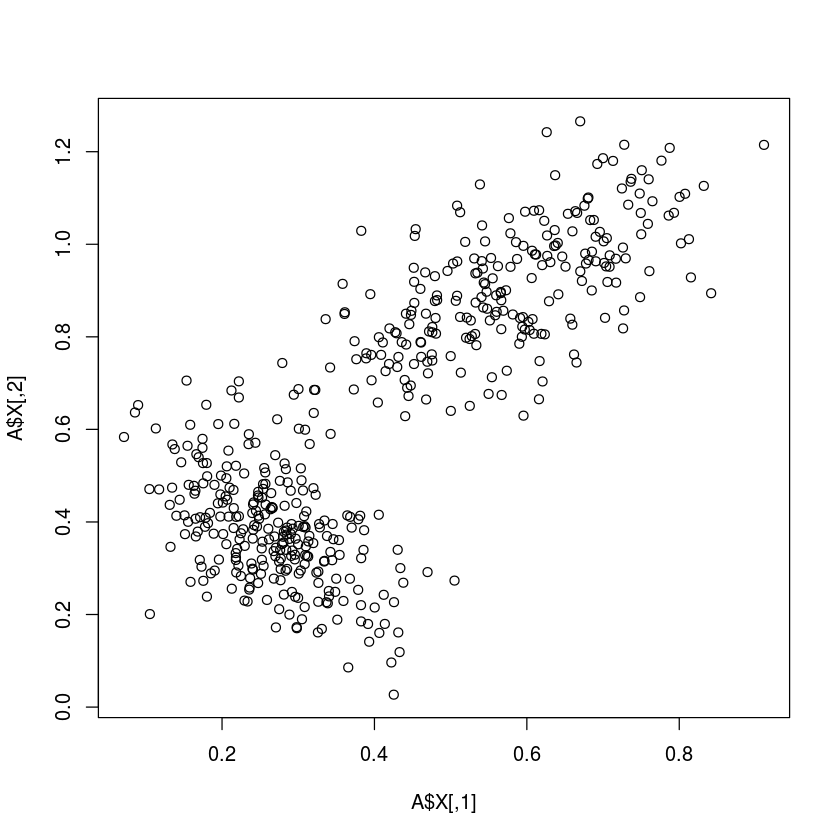

In [3]:
## generate data from a 2-dimensional Gaussian mixture model
library(MixSim)
set.seed(1)
Q <- MixSim(BarOmega = 0.01,K = 2, p = 2)
A <- simdataset(n = 500, Pi = Q$Pi, Mu = Q$Mu, S = Q$S)
plot(A$X)

In [4]:
## computes Euclidean distance between all pairs of observations
D <- dist(A$X)

In [5]:
## finds groups using distances
out <- hclust(D, method = "complete", members = NULL) 

In [6]:
## find two groups, get membership
group <- cutree(out,k=2)

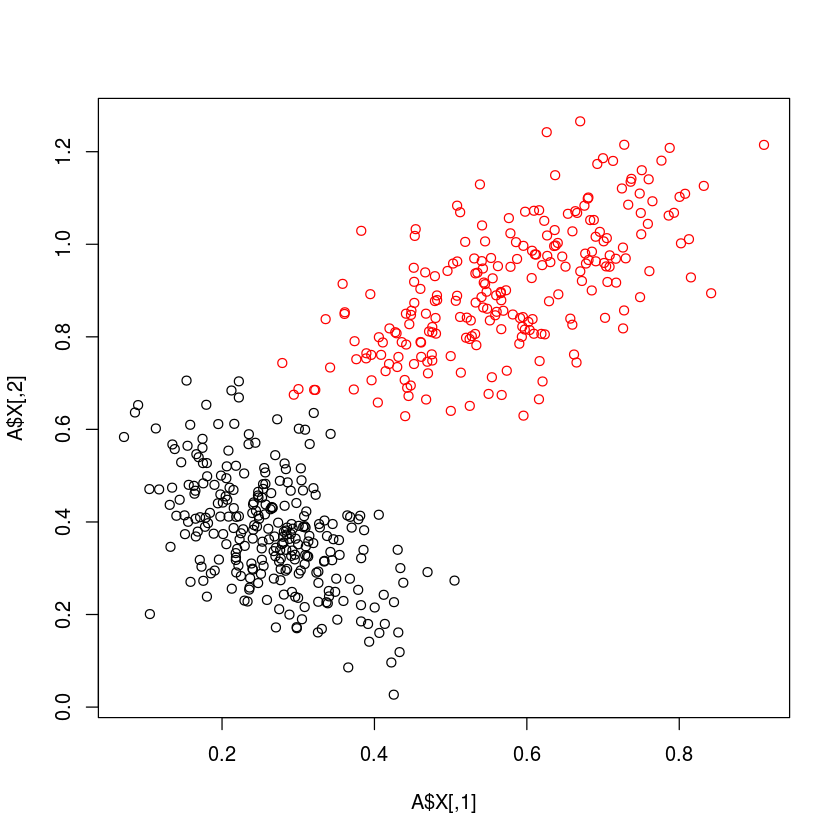

In [7]:
plot(A$X,col=group)

In [128]:
## how does this algorithm scale?
## analyze just the computation of D

## create data sets in sizes of power of 10
ns <- 2^(6:10)
X <- vector("list",length(ns))
for(ii in 1:length(X)){
    X[[ii]] <- simdataset(n = ns[ii], Pi = Q$Pi, Mu = Q$Mu, S = Q$S)$X
    
}

In [129]:
## computes mean for data set x[[ii]]
DistanceTest <- function(ii){
    dist(X[[ii]])
}

In [130]:
out <- microbenchmark(DistanceTest(1),DistanceTest(2),DistanceTest(3),DistanceTest(4),DistanceTest(5),times=20)
summary(out)

expr,min,lq,mean,median,uq,max,neval
DistanceTest(1),24.556,26.4665,32.68105,28.3910,30.3105,85.082,20
DistanceTest(2),61.815,63.7935,69.61615,66.0785,74.4340,82.730,20
DistanceTest(3),211.939,213.2270,275.69120,214.9820,217.5815,1375.419,20
DistanceTest(4),808.981,811.3915,821.18805,813.3745,829.7840,858.892,20
DistanceTest(5),3219.209,3234.1230,3266.01770,3246.9620,3275.8605,3431.236,20


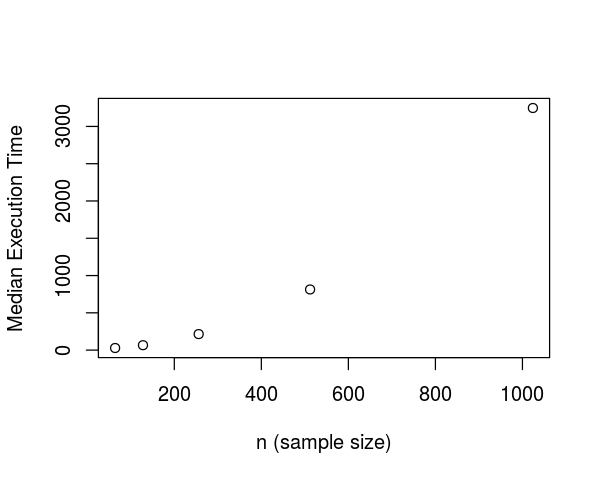

In [131]:
plot(ns,summary(out)$median,xlab="n (sample size)",ylab="Median Execution Time")

### Notes

* %timeit magic functions in python are useful for timing small chuncks of code. See VanderPlas [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) for many usage.

## Complexity of Various Algorithms


| Complexity    | Max Data Set Size     | Examples  |
| ------------- |:-------------:| -----:|
| $O(n)$      | large | Linear Regression |
| $O(nlog(n))$      | large      |  Fast Fourier Transform, some sorting algorithms  |
| $O(n^2)$ | medium      |    Fourier Transform, Distance Based Clustering |
| $O(n^3)$ | small      |    Gaussian Processes (naive implementations) |

